In [3]:

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.40.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached protobuf-3.17.3-cp38-cp38-win_amd64.whl (909 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (

In [18]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [19]:
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


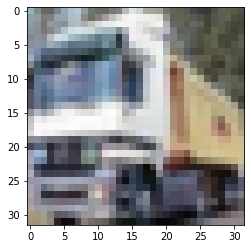

In [20]:
plt.imshow(x_train[1])

In [21]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

In [22]:
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [23]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [24]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [25]:
def results(model):
  epoch = 12
  r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch  ,steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val) , verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("test set loss : " , acc[0])
  print("test set accuracy :", acc[1]*100)

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()


  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

In [26]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
	                BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
	                Flatten(),
	                Dense(128, activation='relu'),
                    Dense(10, activation='softmax')                    
])

opt =    tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/12
1562/1562 [==============================] - 225s 144ms/step - loss: 1.7001 - accuracy: 0.3938 - val_loss: 1.4469 - val_accuracy: 0.4862
Epoch 2/12
1562/1562 [==============================] - 221s 141ms/step - loss: 1.3773 - accuracy: 0.5132 - val_loss: 1.1863 - val_accuracy: 0.5862
Epoch 3/12
1562/1562 [==============================] - 224s 143ms/step - loss: 1.2305 - accuracy: 0.5726 - val_loss: 1.3645 - val_accuracy: 0.5578
Epoch 4/12
1562/1562 [==============================] - 232s 149ms/step - loss: 1.1171 - accuracy: 0.6140 - val_loss: 1.1976 - val_accuracy: 0.6100
Epoch 5/12
1562/1562 [==============================] - 219s 140ms/step - loss: 1.0425 - accuracy: 0.6411 - val_loss: 0.9886 - val_accuracy: 0.6734
Epoch 6/12
1562/1562 [==============================] - 225s 144ms/step - loss: 0.9847 - accuracy: 0.6638 - val_loss: 0.9876 - val_accuracy: 0.6720
Epoch 7/12
1562/1562 [==============================] - 228s 146ms/step - loss: 0.9379 - accuracy: 0.6807 - val_

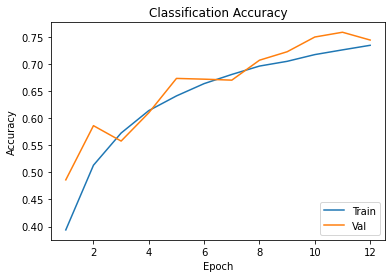

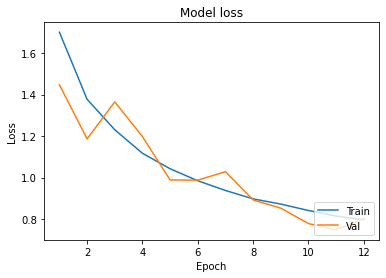

In [27]:
results(model)

In [ ]:
model.save("model2.hdf5")